In [4]:
import pandas as pd
import cv2
import numpy as np 
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,LeakyReLU,concatenate,ZeroPadding2D,BatchNormalization,Conv2DTranspose
from keras.layers import Add
from keras.models import Model
from keras.layers import Input, Dense
import os 
import cv2 
from matplotlib.pyplot import imshow,title ,show
from keras.applications import Xception
from keras import backend as K
from keras.losses import binary_crossentropy 
from keras.callbacks import ModelCheckpoint,Callback
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import pandas as pd
import nibabel as nib


3 ['CR', 'CT'] 0 15


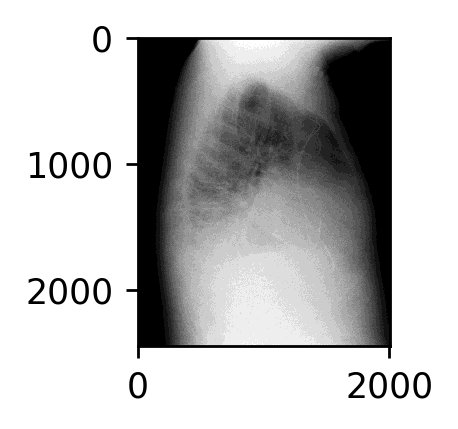

4 ['CR', 'CT'] 0 15


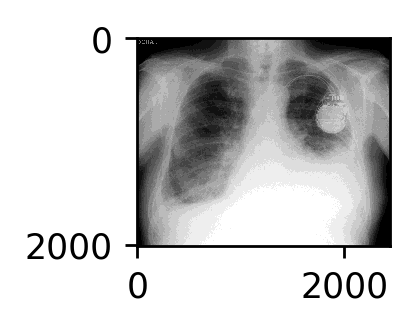

5 ['CR', 'CT'] 0 15


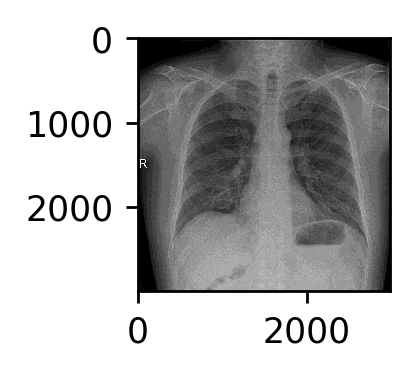

6 ['CR', 'CT'] 0 15


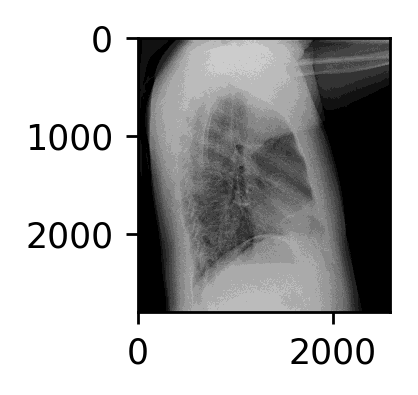

7 ['CR', 'CT'] 0 15


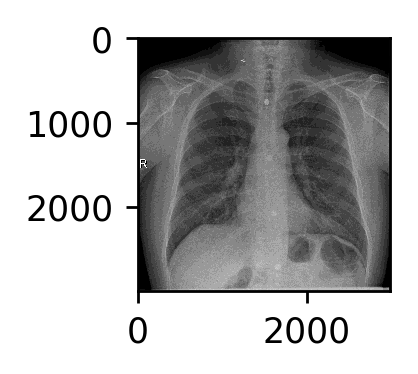

8 ['CR', 'CT'] 0 13


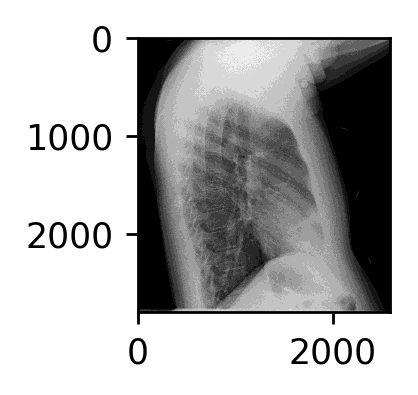

76 ['CR', 'CT'] 0 13


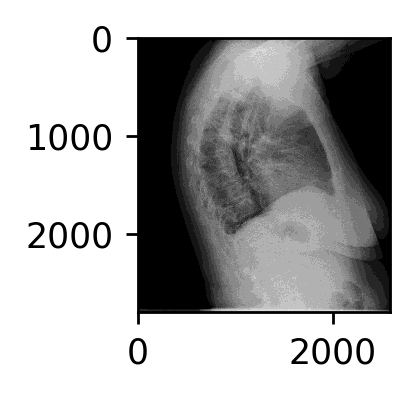

77 ['CR', 'CT'] 0 15


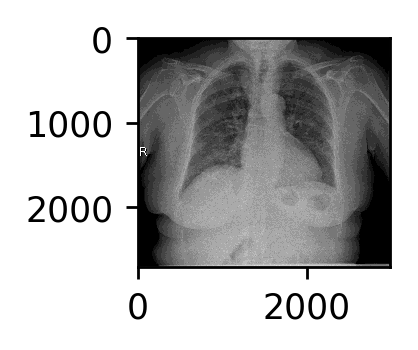

92 ['CR', 'CT'] 0 14


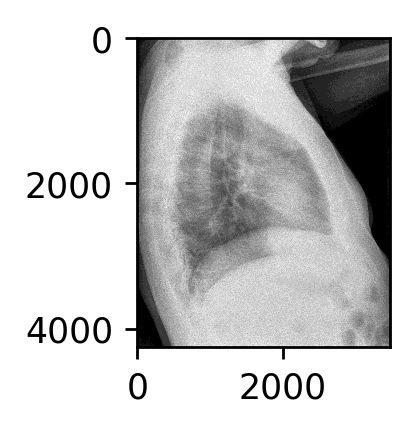

93 ['CR', 'CT'] 0 15


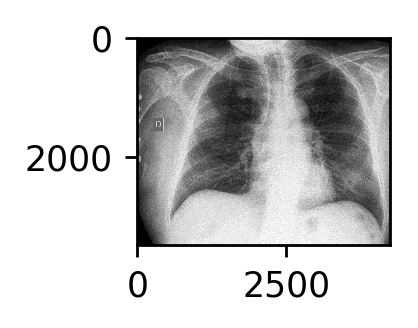

KeyboardInterrupt: 

In [34]:
for index, row in df.iterrows():
    if 'CT' in row['modality_dicom']:
        image=cv2.imread(row['filepath'])
        plt.figure(dpi=250)
        plt.subplot(1,4,1)
        x=cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
        plt.imshow(x)

        print (index, row['modality_dicom'], np.min(image), np.max(image))
        plt.show()

# READ .nii.gz files

In [58]:
import nibabel as nib

img = nib.load('/opt/bucketdata/ORIGINAL_DATA/MIMIC/chexpert/bimcv_covid19/BIMCV-COVID19/extracted/sub-S04428/ses-E08806/mod-rx/sub-S04428_ses-E08806_run-2_bp-chest_ct.nii.gz')
data = np.array(img.get_fdata())

In [59]:
data.shape

(512, 512, 451)

TypeError: Invalid dimensions for image data

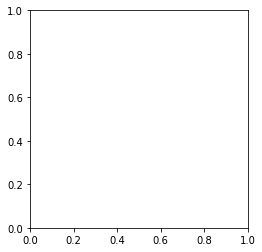

In [60]:
plt.imshow(data[:,:,0][0])

In [50]:
np.max(data)

187.0

In [51]:
x=cv2.normalize(data, None, 0, 255, cv2.NORM_MINMAX)

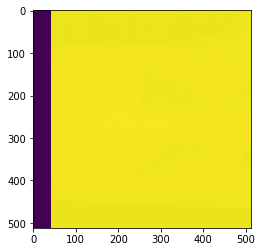

In [57]:
plt.imshow(x.astype('uint8'))

In [56]:
np.min(x)

0.0

In [68]:
x_test=np.rot90(data,1)

In [62]:
x_test.shape

(512, 512, 451)

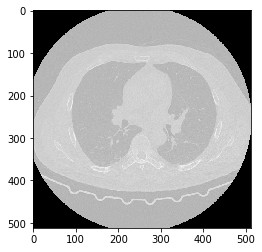

In [70]:
plt.imshow(x_test[:,:,250], cmap='gray')

In [71]:
x=cv2.normalize(x_test[:,:,250], None, 0, 255, cv2.NORM_MINMAX)

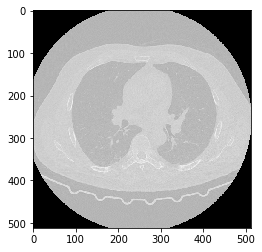

In [91]:
plt.imshow(x.astype('uint8'), cmap='gray')

In [74]:
np.max(x)

255.00000000000003

In [85]:
x_test[:,:,250].shape

(512, 512)

In [87]:
x_test.shape[2]

451

# Gather all the .nii.gz files

In [1]:
import glob
all_cts=glob.glob('/opt/bucketdata/ORIGINAL_DATA/MIMIC/chexpert/bimcv_covid19/BIMCV-COVID19/extracted/*/*/*/*.nii.gz')

In [5]:
len(all_cts)

2291

In [83]:
count=0
index_count_dict={}
for idx, i in enumerate(all_cts):
#     csv_name=i.split('/')[-1].strip('.nii.gz')+'.csv'
    
    img = nib.load(i)
    data = np.array(img.get_fdata())
    x=np.rot90(data,1)
        
#     for jdx in range(x.shape[2]):
    if x.shape[2]>100:
#         print (idx, x.shape[2])
        index_count_dict[idx]=x.shape[2]
        count+=1
        
    else:
#         plt.figure(dpi=250)
#         plt.subplot(1,4,1)
#         x=cv2.normalize(x, None, 0, 255, cv2.NORM_MINMAX)
#         plt.imshow(x, cmap='gray')
#         print (idx)
#         plt.show()
        continue
    
    print (idx)

0
6
8
14
20
23
24
26
27
28
31
35
36
42
49
50
56
68
90
92
97
108
109
111
121
130
140
141
142
143
145
148
150
151
153
155
156
157
158
159
160
161
186
215
230
263
284
290
299
303
320
332
351
357
358
361
363
364
365
368
369
370
371
372
376
378
380
381
382
384
385
387
388
391
395
396
397
407
410
411
414
420
421
425
426
427
429
430
431
432
433
434
436
447
459
460
471
498
501
503
505
506
508
510
511
512
529
574
575
578
579
580
581
582
586
588
590
594
597
599
600
602
610
627
655
658
669
673
679
690
691
703
751
775
781
792
794
802
803
811
818
839
840
841
844
846
847
849
851
855
884
906
911
915
916
918
919
921
922
923
927
928
930
931
934
935
940
943
944
945
946
955
956
958
961
962
964
972
974
975
980
984
985
990
995
996
1002
1013
1017
1023
1027
1029
1031
1033
1042
1048
1056
1057
1070
1078
1080
1083
1088
1089
1090
1094
1097
1109
1116
1118
1128
1130
1131
1133
1135
1136
1140
1141
1143
1144
1145
1147
1149
1150
1151
1152
1192
1198
1199
1200
1201
1204
1205
1208
1212
1281
1316
1327
1330
1431
1432
1436


In [121]:
count=0
patients=[]
reports=[]
for i in index_count_dict.keys():
    if index_count_dict[i] > 325:
        reports.append(all_cts[i].split('/')[9])
        patients.append(all_cts[i].split('/')[10])
        
        print (i)
        count+=1
        
print (count)

8
14
20
24
31
121
140
160
161
263
299
303
332
363
369
370
371
372
378
380
381
384
385
395
396
397
407
410
411
414
426
429
432
436
510
575
594
599
600
602
610
691
775
781
792
803
841
847
849
916
921
928
930
931
935
943
944
1013
1017
1031
1048
1056
1057
1070
1078
1088
1089
1116
1128
1130
1131
1133
1140
1141
1144
1147
1152
1198
1200
1204
1327
1431
1436
1440
1442
1443
1456
1457
1460
1463
1464
1466
1541
1543
1544
1545
1548
1604
1606
1611
1658
1668
1695
1701
1702
1704
1707
1713
1714
1723
1727
1728
1732
1734
1737
1738
1739
1745
1746
1748
1751
1752
1759
1762
1766
1768
1785
1786
1791
1792
1793
1795
1797
1802
1804
1805
1806
1884
1887
1890
1891
1895
1896
1897
1899
1904
1919
1928
1933
1936
1940
1943
2016
2019
2022
2023
2149
2185
2188
2195
2198
2199
2202
2226
2230
2233
2284
2288
2290
169


In [123]:
len(set(patients))

110

In [15]:
len(all_cts)

2291

In [107]:
all_cts[27]

'/opt/bucketdata/ORIGINAL_DATA/MIMIC/chexpert/bimcv_covid19/BIMCV-COVID19/extracted/sub-S03365/ses-E06669/mod-rx/sub-S03365_ses-E06669_acq-1_run-3_bp-chest_ct.nii.gz'

In [111]:
i=all_cts[2290]

In [112]:
img = nib.load(i)
data = np.array(img.get_fdata())
x=np.rot90(data,1)

In [113]:
x.shape

(512, 512, 374)

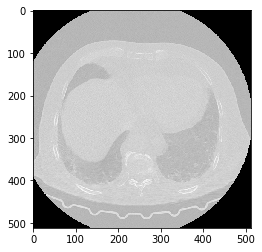

In [118]:
plt.imshow(x[:,:,100],cmap='gray')

In [74]:
np.unique(x[:,:,30])

array([-2048., -1072., -1064., ...,  1333.,  1390.,  1419.])

In [81]:
final_image.shape

(512, 512)

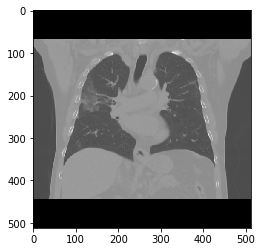

In [78]:
plt.imshow(normalized_slice,cmap='gray')

In [75]:
image=x[:,:,30]
image=cv2.resize(image, (512,512))

normalized_slice=cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

final_image=normalized_slice.astype('uint8')


img2 = np.zeros((512,512,3), dtype='uint8')
img2[:,:,0] = final_image
img2[:,:,1] = final_image
img2[:,:,2] = final_image

In [120]:
all_cts[13].split('/')[10]

'ses-E08733'